# Fourier Transform

The Fourier Transform is a mathematical technique that transforms a function of time into a function of frequency. It is used to analyze the frequency content of a signal. The Fourier Transform is a complex function, and it is often represented in terms of its magnitude and phase. The magnitude of the Fourier Transform is a measure of the amplitude of the frequency components of the signal, and the phase is a measure of the time delay of the frequency components.

The Fourier Transform is used in many areas of science and engineering, including signal processing, image processing, and communications. It is also used in physics and mathematics to solve differential equations and to study the behavior of waves.

The Fourier Transform is a powerful tool for analyzing the frequency content of a signal. It can be used to identify the frequency components of a signal, to filter out unwanted noise, and to extract useful information from a signal. It is also used to analyze the behavior of systems that are described by differential equations, such as the behavior of mechanical and electrical systems.

## Discrete Fourier Transform

The Discrete Fourier Transform (DFT) is a version of the Fourier Transform that is used to analyze the frequency content of a discrete-time signal. It is used to transform a sequence of N samples of a signal into a sequence of N frequency components. The DFT is defined by the following equation:

$$X[k] = \sum_{n=0}^{N-1} x[n] e^{-j2\pi kn/N}$$

where $x[n]$ is the input signal, $X[k]$ is the DFT of the input signal, and $N$ is the number of samples in the input signal. The DFT is a complex function, and it is often represented in terms of its magnitude and phase.

## Fast Fourier Transform

The Fast Fourier Transform (FFT) is an algorithm that is used to compute the Discrete Fourier Transform (DFT) of a sequence of N samples of a signal. The FFT is an efficient algorithm that reduces the number of operations required to compute the DFT from $O(N^2)$ to $O(N\log N)$. This makes it possible to compute the DFT of large sequences of samples in a reasonable amount of time.

## FFT in Python

The FFT algorithm is implemented in the numpy library in Python. The numpy library provides a function called fft that can be used to compute the FFT of a sequence of samples of a signal. The fft function takes a sequence of samples of a signal as input and returns the FFT of the input signal. The FFT of the input signal is a sequence of frequency components that represent the frequency content of the input signal.

Text(0, 0.5, 'Amplitude')

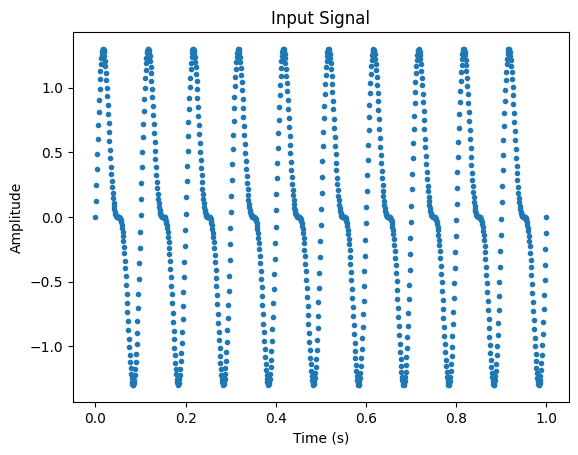

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sequence of samples of a signal
# this is a sum of two sine waves with frequencies 10 Hz and 20 Hz
# the sampling frequency is 1000 Hz
# the signal has 1000 samples
# the duration of the signal is 1 second
# the amplitude of the sine waves is 1 and 0.5, respectively
#
# the Nyquist frequency is 500 Hz
# the frequency resolution is 1 Hz
#
# the FFT of the signal SHOULD, therefore, have 500 frequency components
# the frequency range of the FFT will be from 0 Hz to 500 Hz
# the magnitude of the FFT will represent the amplitude of the frequency components
#
N = 1000
t = np.linspace(0, 1, N)
x = np.sin(2 * np.pi * 10 * t) + 0.5 * np.sin(2 * np.pi * 20 * t)

# Plot the input signal
plt.figure()
plt.plot(t, x, '.')
plt.title('Input Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


Text(0, 0.5, 'Magnitude')

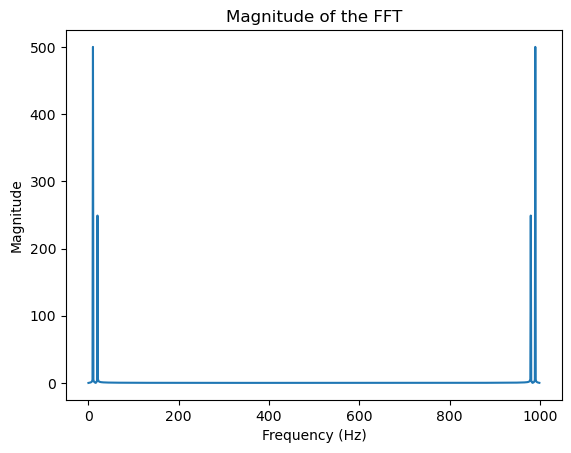

In [15]:
# Compute the FFT of the input signal
#
# Note: the FFT function in numpy calculates the FFT up to TWICE the Nyquist frequency, by default ... so the frequency range of the FFT returned by numpy's fft function will be from 0 Hz to 1000 Hz
#
# We have to therefore very careful when interpreting the frequency components of the FFT!!!!!!!!!

X = np.fft.fft(x)

# Plot the magnitude of the FFT
plt.figure()
plt.plot(np.abs(X))
plt.title('Magnitude of the FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')


Text(0, 0.5, 'Magnitude')

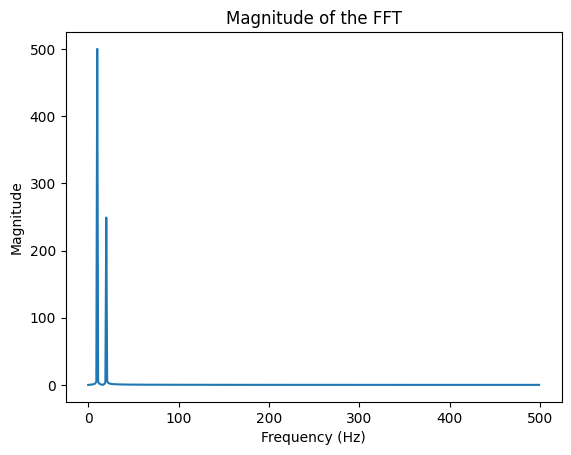

In [2]:
# Calculate the FFT of the input signal and extract the frequencies of the FFT

X = np.fft.fft(x)
X = X[:N//2]

# Extract the frequencies of the FFT (This is the x-axis)
f = np.fft.fftfreq(N, 1/1000)
f = f[:N//2]

# Plot the magnitude of the FFT
plt.figure()
plt.plot(f,np.abs(X))
plt.title('Magnitude of the FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')


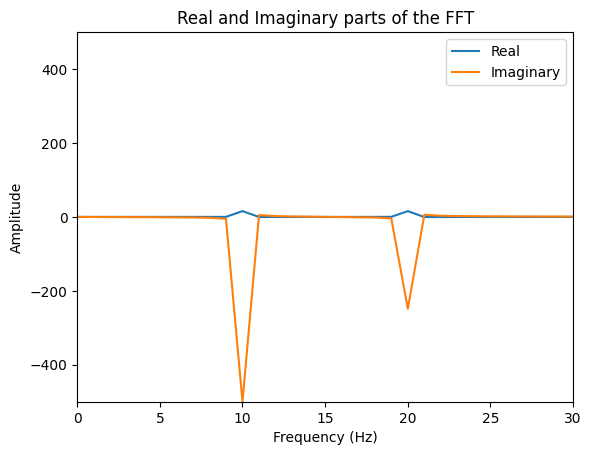

In [3]:
# Plot the real and imaginary parts of the FFT
plt.figure()
plt.plot(f, np.real(X), label='Real')
plt.plot(f, np.imag(X), label='Imaginary')
plt.title('Real and Imaginary parts of the FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.xlim(0, 30)
plt.ylim(-500, 500)
plt.legend()


## Example 1 from FourierSeriesDiscrete.ipynb

Let's revisit the example from the notebook FourierSeriesDiscrete.ipynb. We will use the FFT to analyze the frequency content of the signal.

In [18]:
npts = 500

# Define the start and end times
xlow = 0.0
xhigh = 30.0

x = np.linspace(xlow,xhigh,npts)
dt = (xhigh-xlow)/npts

# Calculate the Nyquist frequency

f_sampling = 1.0/dt
f_nyquist = f_sampling/2.0

print ('Nyquist frequency = ',f_nyquist)

# the Nyquist frequency corresponds to the highest meaningful frequency component
#
# The terms in the Fourier approximation look like cos(n*np.pi*t/P) or sin(n*np.pi*t/P)
#
# Thus, omega = n*np.pi/P = n*np.pi/(thigh-tlow)
#       f = omega/(2.0*np.pi) = n/(2.0*(thigh-tlow))
#
#       f_nyquist = n_max/(2.0*(thigh-tlow))
#
#       n_max = 2.0*(thigh-tlow)*f_nyquist

nterms = int((xhigh-xlow)*f_nyquist)

print ('Max terms = ',nterms)

aliasing_factor = 2.0
nterms = 250

Nyquist frequency =  8.333333333333334
Max terms =  250


In [19]:
# We begin with a base signal frequency, f_signal = 0.16
# We will add additional frequencies to this base signal
f_signal = 0.16

# Define the angular frequency, omega
w = f_signal*2.0*np.pi

# Define the function
# f(x) = sin(w*x) + 0.8*sin(2.0*w*x) + 0.6*sin(3.0*w*x) + 0.4*sin(4.0*w*x)
#
# So, we will have FOUR frequencies in the signal
#
fx = []
for i in range(len(x)):
    fx.append(1.0*np.sin(w*x[i]) + 0.8*np.sin(2.0*w*x[i]) + 0.6*np.sin(3.0*w*x[i]) + 0.4*np.sin(4.0*w*x[i]))
    #fx.append(1.0*np.sin(w*x[i]))
    

Text(0, 0.5, 'f(t)')

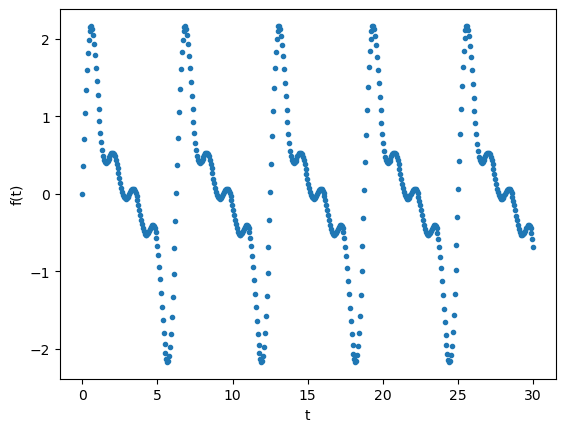

In [20]:
plt.plot(x,fx,'.')
plt.xlabel('t')
plt.ylabel('f(t)')

In [21]:
x2 = np.linspace(xlow,xhigh,npts)
fx_fourier = np.zeros(len(x2))

n = []
an = []
bn = []
pn = []
fn = []

for i in range(nterms+1):
    T = (xhigh-xlow)
    n.append(i)
    fn.append(i/T)
    
    # Method 2:  Numerical integration to calculate
    # the coefficients
    
    a0sum = 0.0
    ansum = 0.0
    bnsum = 0.0

    for k in range(len(x2)):
        a0sum = a0sum + aliasing_factor/T*fx[k]*dt
        ansum = ansum + aliasing_factor/T*fx[k]*np.cos(2*i*np.pi*x2[k]/T)*dt
        bnsum = bnsum + aliasing_factor/T*fx[k]*np.sin(2*i*np.pi*x2[k]/T)*dt
        
    if (i==0):
        an.append(a0sum)
        bn.append(0)
        pn.append(np.sqrt(an[i]**2+bn[i]**2))
    else:
        an.append(ansum)
        bn.append(bnsum)
        pn.append(np.sqrt(an[i]**2+bn[i]**2))
        
    for j in range(len(x2)):
        if i==0:
            fx_fourier[j] = fx_fourier[j]+an[0]/2.0
        else:
            if (j==0 and i<=10): 
                print ("Data: n = %0.4f, a_n = %0.4f, bn = %0.4f" % (i,an[i],bn[i]))
            fx_fourier[j] = fx_fourier[j]+an[i]*np.cos(2*i*np.pi*x2[j]/T)+bn[i]*np.sin(2*i*np.pi*x2[j]/T) 

Data: n = 1.0000, a_n = 0.1233, bn = -0.0145
Data: n = 2.0000, a_n = 0.1329, bn = -0.0334
Data: n = 3.0000, a_n = 0.1563, bn = -0.0673
Data: n = 4.0000, a_n = 0.2368, bn = -0.1758
Data: n = 5.0000, a_n = -0.4413, bn = 0.7644
Data: n = 6.0000, a_n = 0.0298, bn = 0.1300
Data: n = 7.0000, a_n = 0.0968, bn = 0.0648
Data: n = 8.0000, a_n = 0.1696, bn = 0.0260
Data: n = 9.0000, a_n = 0.4209, bn = -0.0618
Data: n = 10.0000, a_n = -0.5257, bn = 0.2447


Text(0, 0.5, 'f(t)')

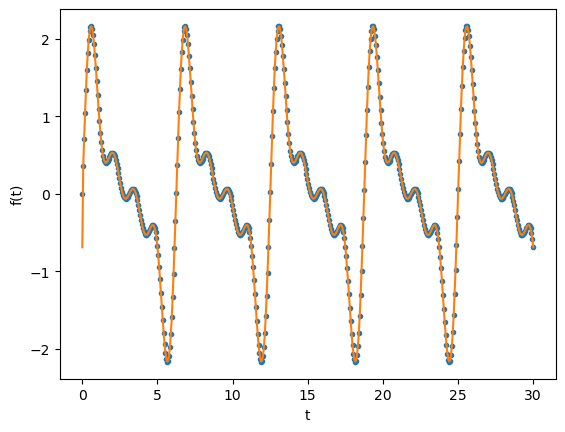

In [22]:
plt.plot(x,fx,'.')
plt.plot(x2,fx_fourier)
plt.xlabel('t')
plt.ylabel('f(t)')

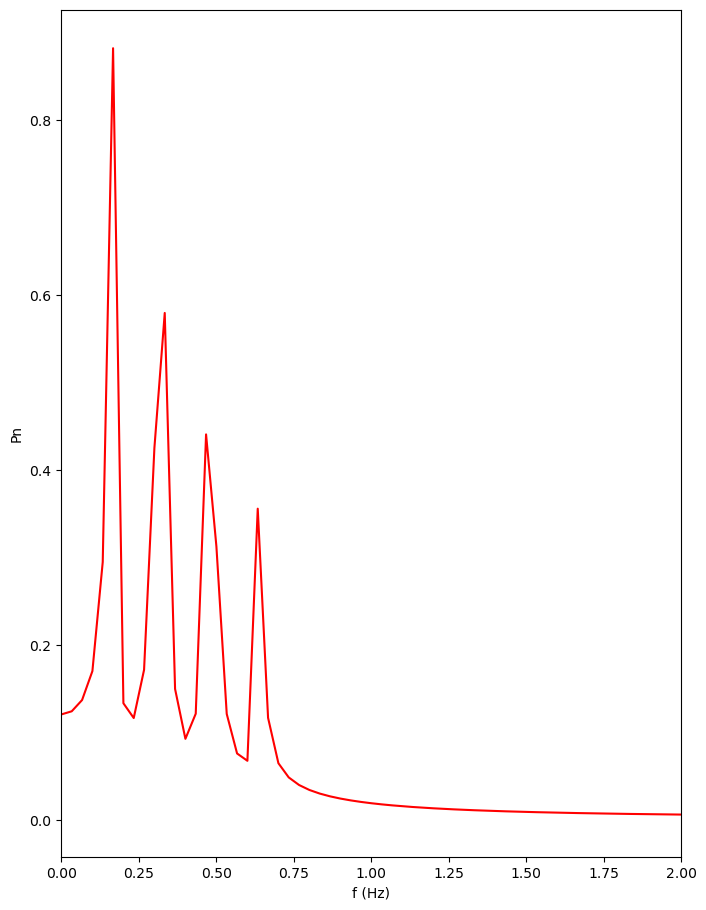

In [23]:
fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,11))
axs2.plot(fn,pn,'r-')
axs2.set_xlim(0.0,2)

axs2.set_xlabel('f (Hz)')
axs2.set_ylabel('Pn')

# Plot vertical lines at the base frequency and its harmonics
plot_f_signal = False
if (plot_f_signal):
    axs2.axvline(x=1.0*f_signal, color='k', linestyle='--')
    axs2.axvline(x=2.0*f_signal, color='k', linestyle='--')
    axs2.axvline(x=3.0*f_signal, color='k', linestyle='--')
    axs2.axvline(x=4.0*f_signal, color='k', linestyle='--')

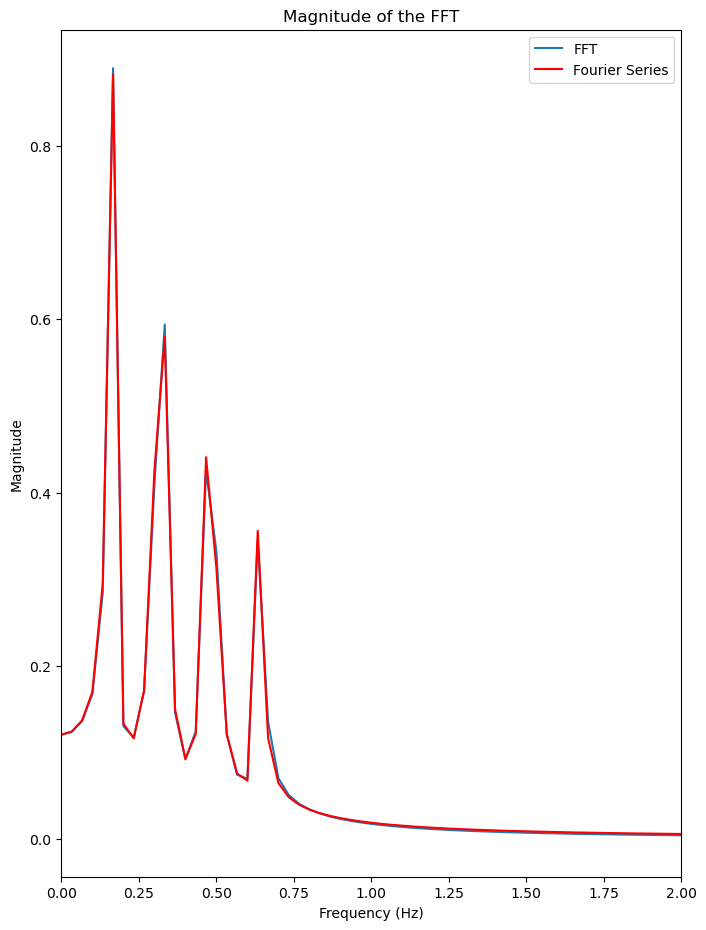

In [24]:
# Now, finally, let's compute the FFT of the signal

FX = np.fft.fft(fx)
FX = aliasing_factor*FX[:npts//2]

f = np.fft.fftfreq(npts, 1/f_sampling)
f = f[:npts//2]

Mag = np.abs(FX)/npts

# Plot the magnitude of the FFT
plt.figure(figsize=(8,11))
plt.plot(f, Mag, label='FFT')
plt.plot(fn,pn,'r-', label='Fourier Series')
plt.title('Magnitude of the FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 2)
plt.legend()

# Conclusion

Aliasing is a really important concept in signal processing. It is important to understand the Nyquist frequency and the Nyquist theorem. The Nyquist theorem states that the sampling frequency must be at least twice the highest frequency component of the signal. If the sampling frequency is less than twice the highest frequency component of the signal, then the signal will be aliased. Aliasing can cause the frequency components of the signal to be misrepresented in the FFT. It is important to be aware of aliasing when analyzing the frequency content of a signal using the FFT.